# Linear Regression : Lab Assignment

The objective of this lab assignment is to perform linear regression on the given "Car
Price Prediction" dataset. In this lab, participants will explore the dataset, preprocess
the data, split it into training and testing sets, build a linear regression model, train the
model, make predictions, and evaluate its performance.
Dataset: You have been provided with the "car_price_data.csv" dataset. This dataset
contains various features of cars, such as mileage, horsepower, number of cylinders,
and other specifications, along with their corresponding prices.

---

# 1. Data Preparation:

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'pandas'

# Loading Data

In [4]:
# Loading Data
data = pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp Resources /Week 02/LAB Assignments/CarPrice_Assignment.csv')

NameError: name 'pd' is not defined

# Exploratary Analysis

In [ ]:
# Look into dimensions
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
# Shape of DataFrame
data.shape

(205, 26)

In [2]:
# Calculate descriptive statistics for the numeric columns in the DataFrame 'data'
# The 'describe()' method provides summary statistics, including mean, standard deviation, quartiles, and more.
a = data.describe()

NameError: name 'data' is not defined

In [3]:
a

NameError: name 'a' is not defined

# 2. Data Preprocessing:

In [166]:
print(data['CarName'])

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [168]:
# one_hot_encoding = pd.get_dummies(data, columns = categorical_features)
# print(one_hot_encoding)

In [169]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in categorical_features:
  data[i] = labelencoder.fit_transform(data[i])

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [170]:
  # data.drop(categorical_features, axis=1, inplace=True)
  # data

In [171]:
# data_combined = pd.concat([data, one_hot_encoding], axis=1)
# print(data_combined)

In [172]:
# data_combined.info()
# type(data_combined)

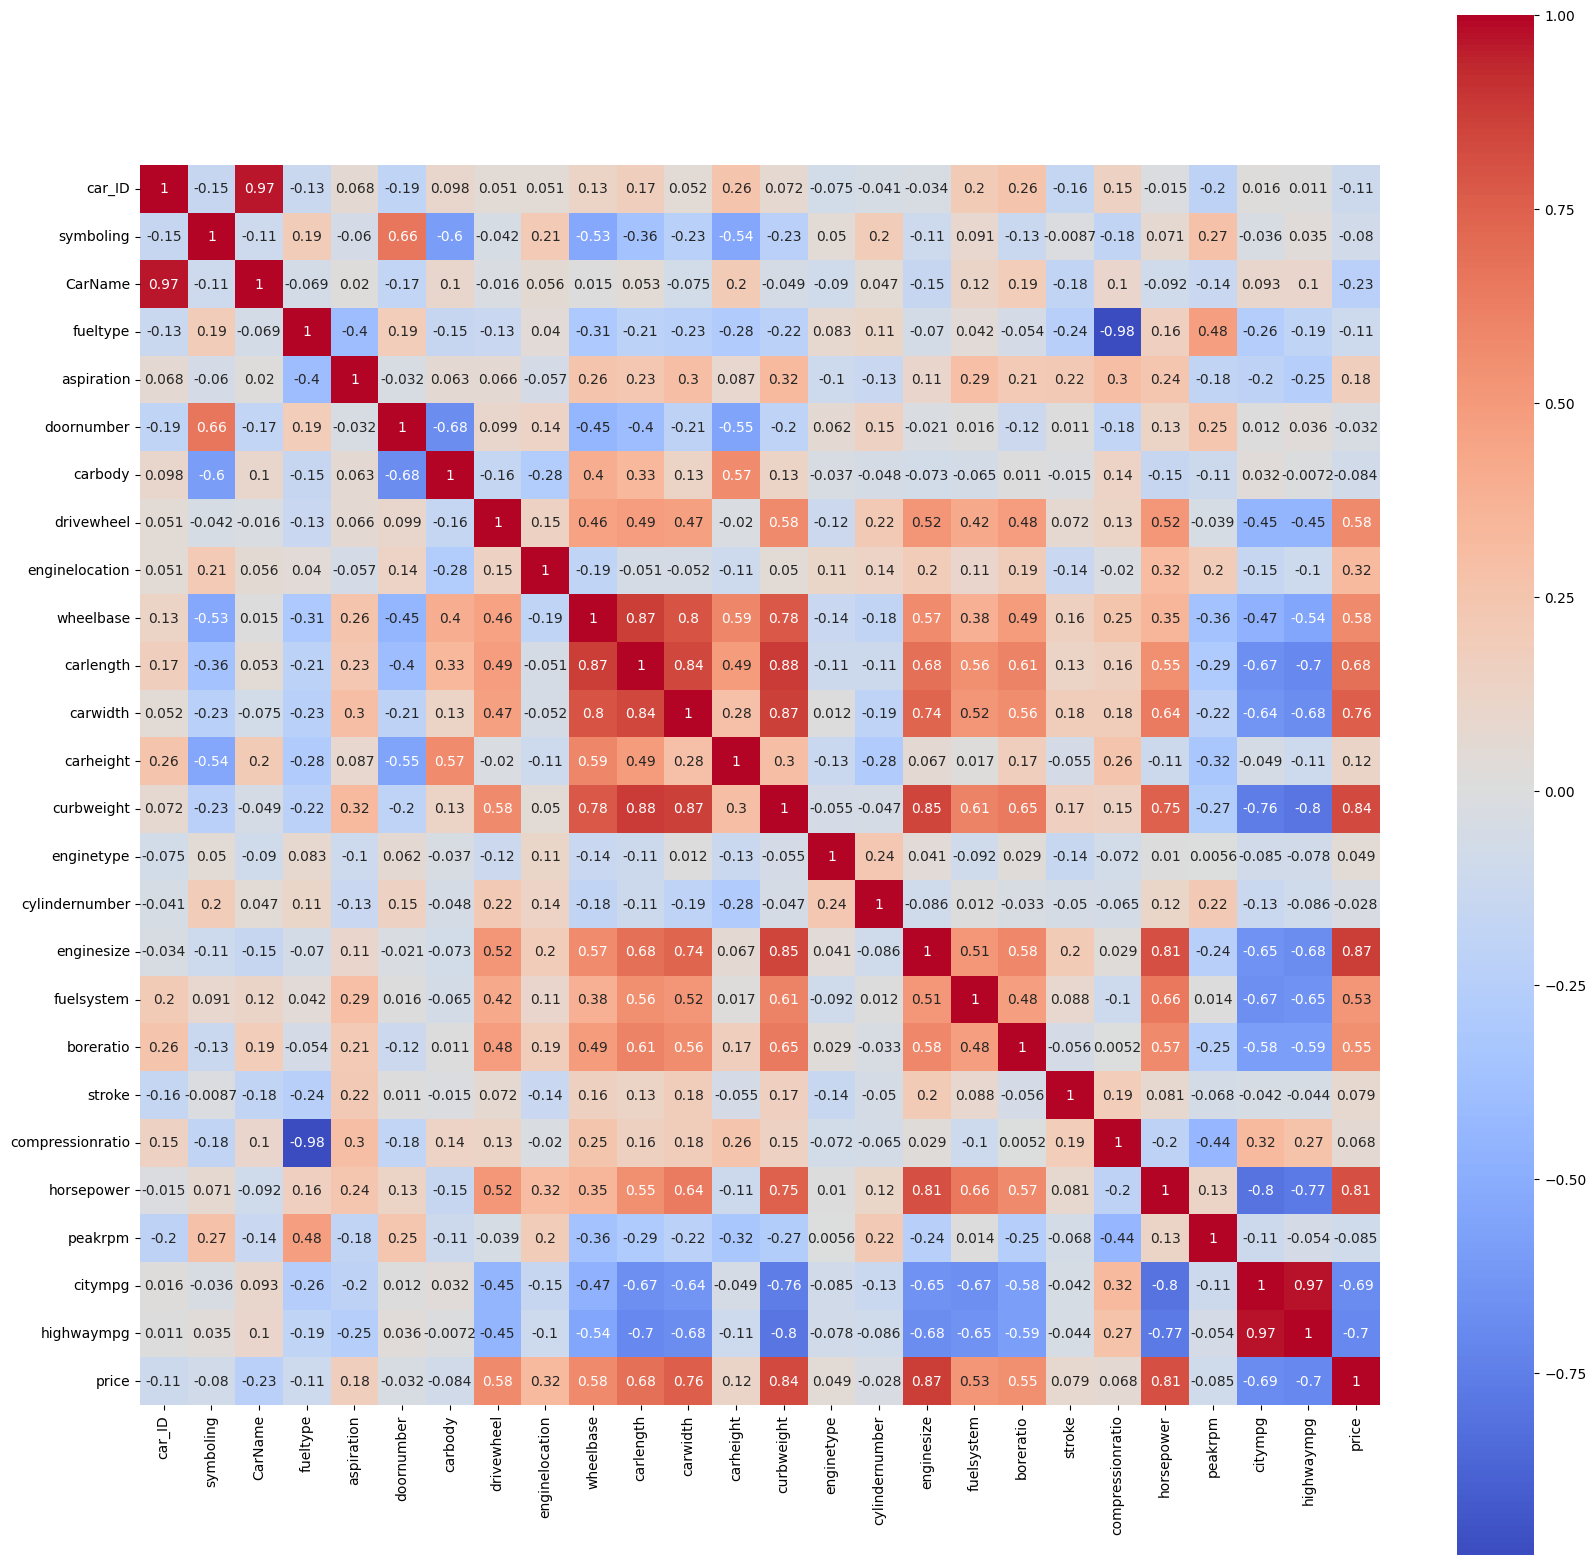

In [173]:
# Correlation beteen different colomns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', square=True)
plt.show()

# Training Model and Testing Model

In [184]:
X = data_combined['curbweight'].values.reshape(-1,1)
Y = data_combined['price'].values.reshape(-1,1)

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

In [186]:
X_train.shape

(287, 1)

In [187]:
model = LinearRegression()

In [188]:
model.fit(X_train, Y_train)

LinearRegression()

In [189]:
y_pred = model.predict(X_test)

In [190]:
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)

In [191]:
  print("Mean Squared Error: ", mse)
  print("R^2 Score: ", r2)

Mean Squared Error:  15373114.90406974
R^2 Score:  0.7234260265649118


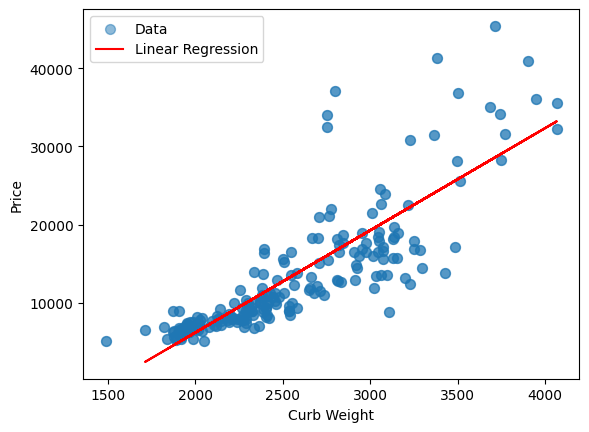

In [192]:
plt.scatter(X,Y, s=50, alpha=0.5, label = 'Data')
plt.plot(X_test,y_pred, color='red', label='Linear Regression')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
sheep = [True,  True,  True,  False,
  True,  True,  True,  True ,
  True,  False, True,  False,
  True,  False, False, True ,
  True,  True,  True,  True ,
  False, False, True,  True]

In [7]:
def count_sheeps(sheep):
    return sheep.count(True)
count_sheeps(sheep)    

17